In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [31]:
# from initial run of m_list, we know the last date is 03/23/2017
# so gather all dates after 03/23/2016
data = engine.execute("SELECT * from measurement WHERE (date LIKE '2017%') OR (date LIKE '2016-08-2%') OR (date LIKE '2016-09%') OR (date LIKE '2016-10%') OR (date LIKE '2016-11%') OR (date LIKE '2016-11%') OR (date LIKE '2016-12')")
m_list = []
for record in data:
    print(record)
    m_list.append(record)

(2361, 'USC00519397', '2016-08-20', 0.0, 80.0)
(2362, 'USC00519397', '2016-08-21', 0.12, 76.0)
(2363, 'USC00519397', '2016-08-22', 0.4, 77.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(23

(7511, 'USC00514830', '2017-03-29', 0.03, 77.0)
(7512, 'USC00514830', '2017-03-30', 0.03, 78.0)
(7513, 'USC00514830', '2017-03-31', 0.0, 77.0)
(7514, 'USC00514830', '2017-04-01', 0.0, 78.0)
(7515, 'USC00514830', '2017-04-02', 0.0, 77.0)
(7516, 'USC00514830', '2017-04-03', 0.09, 77.0)
(7517, 'USC00514830', '2017-04-04', 0.0, 76.0)
(7518, 'USC00514830', '2017-04-05', 0.07, 77.0)
(7519, 'USC00514830', '2017-04-06', 0.0, 76.0)
(7520, 'USC00514830', '2017-04-07', 0.0, 76.0)
(7521, 'USC00514830', '2017-04-09', None, 77.0)
(7522, 'USC00514830', '2017-04-10', 0.0, 79.0)
(7523, 'USC00514830', '2017-04-11', 0.16, 77.0)
(7524, 'USC00514830', '2017-04-12', 0.29, 77.0)
(7525, 'USC00514830', '2017-04-13', 0.0, 77.0)
(7526, 'USC00514830', '2017-04-14', 0.29, 77.0)
(7527, 'USC00514830', '2017-04-17', None, 69.0)
(7528, 'USC00514830', '2017-04-18', 0.12, 76.0)
(7529, 'USC00514830', '2017-04-19', 0.0, 83.0)
(7530, 'USC00514830', '2017-04-20', 0.0, 74.0)
(7531, 'USC00514830', '2017-04-21', 1.05, 70.0)
(7

(14959, 'USC00519281', '2017-08-18', 0.06, 79.0)
(19199, 'USC00516128', '2016-08-20', 0.2, 76.0)
(19200, 'USC00516128', '2016-08-21', 1.08, 74.0)
(19201, 'USC00516128', '2016-08-22', 1.2, 72.0)
(19202, 'USC00516128', '2016-08-23', 0.7, 74.0)
(19203, 'USC00516128', '2016-08-24', 1.45, 74.0)
(19204, 'USC00516128', '2016-08-25', 0.11, 77.0)
(19205, 'USC00516128', '2016-08-27', None, 74.0)
(19206, 'USC00516128', '2016-08-28', 2.07, 71.0)
(19207, 'USC00516128', '2016-08-29', 0.9, 78.0)
(19210, 'USC00516128', '2016-09-01', 0.01, 77.0)
(19211, 'USC00516128', '2016-09-02', 0.03, 75.0)
(19212, 'USC00516128', '2016-09-03', 1.0, 75.0)
(19213, 'USC00516128', '2016-09-04', 0.44, 73.0)
(19214, 'USC00516128', '2016-09-05', 0.18, 76.0)
(19215, 'USC00516128', '2016-09-06', 1.0, 73.0)
(19216, 'USC00516128', '2016-09-07', 1.35, 74.0)
(19217, 'USC00516128', '2016-09-08', 0.15, 74.0)
(19218, 'USC00516128', '2016-09-09', 0.35, 75.0)
(19219, 'USC00516128', '2016-09-10', 1.16, 75.0)
(19220, 'USC00516128', '20

(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)


In [29]:
# turn m_list into a dataframe & look at what we've got
# id INTEGER, station TEXT, date TEXT, prcp FLOAT, tobs FLOAT
mdata_df = pd.DataFrame(m_list, columns=['id', 'station', 'date', 'prcp', 'tobs'])
mdata_df.head()

,id,station,date,prcp,tobs
0,2495,USC00519397,2017-01-01,0.0,62.0
1,2496,USC00519397,2017-01-02,0.0,66.0
2,2497,USC00519397,2017-01-03,0.0,63.0
3,2498,USC00519397,2017-01-04,0.0,62.0
4,2499,USC00519397,2017-01-05,0.0,63.0


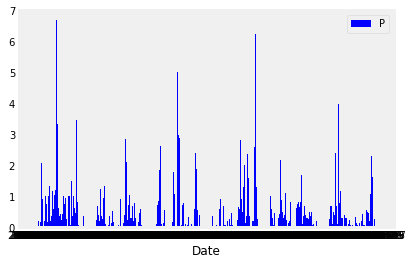

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
# find the last value in the list
#print(m_list[-1])

# pop the values until we hit march 23rd
# so pop 3 times
m_list.pop(0)
m_list.pop(0)
m_list.pop(0)

# Perform a query to retrieve the data and precipitation scores
prcp_and_date = engine.execute("SELECT date, prcp FROM measurement WHERE (date LIKE '2017%') OR (date LIKE '2016-08-2%') OR (date LIKE '2016-09%') OR (date LIKE '2016-10%') OR (date LIKE '2016-11%') OR (date LIKE '2016-11%') OR (date LIKE '2016-12%')")
p_n_d_list = []
for record in prcp_and_date:
    #print(record)
    p_n_d_list.append(record)
p_n_d_list.pop(2)
p_n_d_list.pop(1)
p_n_d_list.pop(0)
# Save the query results as a Pandas DataFrame and set the index to the date column
p_n_d_df = pd.DataFrame(p_n_d_list, columns=["Date", "PRCP Score"])
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(p_n_d_df["Date"], p_n_d_df["PRCP Score"], color='b')
plt.grid()
plt.legend("Precipitation")
plt.xlabel("Date")
plt.show()

![precipitation](Images/precipitation.png)

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
descr = p_n_d_df.describe()

descr

,PRCP Score
count,1845.000000
mean,0.177035
std,0.471876
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.700000


![describe](Images/describe.png)

In [50]:
# Design a query to show how many stations are available in this dataset?
station_data = engine.execute("SELECT count(station) FROM station")
for record in station_data:
    print(record)

(9,)


In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_data2 = engine.execute("SELECT station.station, count(date) FROM station JOIN measurement ON station.station = measurement.station GROUP BY station.station ORDER BY station.station DESC")
for record in station_data2:
    print(record)

('USC00519523', 2669)
('USC00519397', 2724)
('USC00519281', 2772)
('USC00518838', 511)
('USC00517948', 1372)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00513117', 2709)
('USC00511918', 1979)


In [68]:
# those arent the right numbers whaaaaat
station_all = engine.execute("SELECT * FROM station")
for record in station_all:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [ ]:
[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_data3 = engine.execute("SELECT max(tobs), min(tobs), avg(tobs) FROM station JOIN measurement ON station.station = measurement.station WHERE station.station = 'USC00519281' GROUP BY station.id")
data_list = []
for record in station_data3:
    data_list.append(record)
print(data_list)

[(85.0, 54.0, 71.66378066378067)]


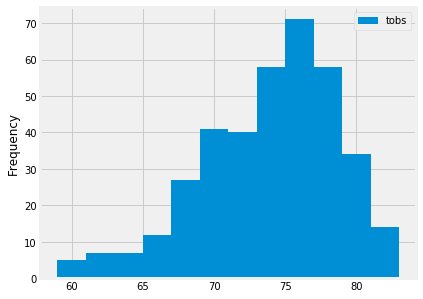

In [109]:
# get the dates for last year to this year
select_filter = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-01', '2017-08-23')).filter(Measurement.station == 'USC00519281').all()
# put dates into a list, and then only get the second value in the results
temp = [result[1] for result in select_filter]
# plot the histograph
plt.figure(figsize=(6,5))
plt.hist(temp, bins=12, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.tight_layout
plt.show()

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [79]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2017-03-01', '2017-03-16')
print(trip_temps)

[(62.0, 71.12121212121212, 82.0)]


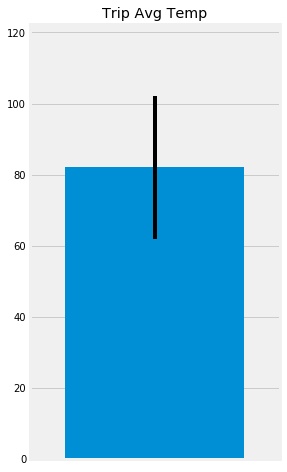

In [107]:
# using the data we found above, turn into variables i guess
avg_temp = 71.12121212121212
min_t = 62.0
max_t = 82.0
p2p = max_t - min_t
x = 1

fig, ax = plt.subplots(figsize=plt.figaspect(2.))

bar = ax.bar(x, max_t, yerr=p2p)
ax.set(xticks=range(x))
ax.margins(.2, .2)
plt.title("Trip Avg Temp")
plt.show()

<IPython.core.display.Javascript object>


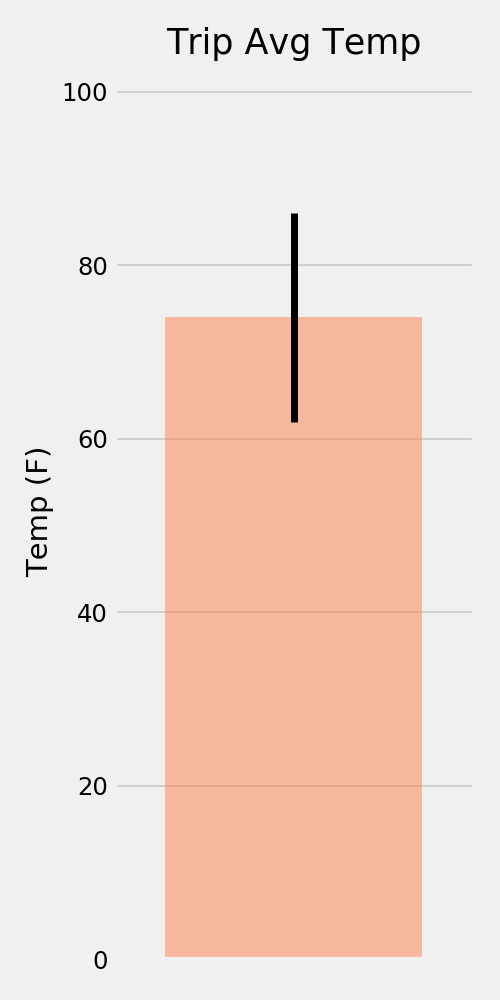

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [86]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# calc_temps('2017-03-01', '2017-03-16')
rain_per_station = engine.execute("SELECT station.station, station.name, station.latitude, station.longitude, station.elevation, avg(measurement.prcp) FROM station JOIN measurement ON station.station = measurement.station WHERE measurement.date BETWEEN '2017-03-01' AND '2017-03-16' GROUP BY measurement.prcp ORDER BY measurement.prcp DESC")
for station in rain_per_station:
    print(station)

('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.4)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.2)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.12)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.88)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.48)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.45)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.19)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.12)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.8)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.73)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.65)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.7113

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment